# First look at the data

In [569]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [570]:
cols = ["date","time","title","from","author","url","photo","type","group",
        "keyword","found keywords","languages","locations","tags","sentiment",
        "auto_sentiment","mention","reach","virality","influence_score","followers",
        "like_count","comment_count","share_count","tweet_count","love_count","wow_count",
        "haha_count","sad_count","angry_count","total_reactions_count","favorite_count",
        "retweet_count","view_count","dislike_coutn","comments_count","likes","dislikes","count"
]

In [571]:
path = "AAPL(24-30) news feeds.csv"

reading file and preconfiguration

Reading csv file
df = pd.read_csv(path,header=None, names=cols, engine='python');
df=df.drop(df.index[0])
df.reset_index(drop=True);

In [572]:
df = pd.read_csv(path)

In [573]:
df.head()

,date,time,title,from,author,url,photo,type,group,keyword,...,favorite_count,retweet_count,view_count,dislike_coutn,comments_count,likes,dislikes,count,reddit_type,score
0,2018-08-31,09:49:10,IoS Based Mobile Games Market 2018 - Global In...,videobasedtutorials.com,NaN,http://www.videobasedtutorials.com/articles/vi...,http://www.abnewswire.com/pressreleases/wp-con...,web,My company,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-31,09:46:09,IoS Based Mobile Games Market 2018 - Global In...,digitalmedianet.com,NaN,http://hollywoodindustry.digitalmedianet.com/a...,http://www.abnewswire.com/pressreleases/wp-con...,web,My company,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-31,09:19:21,Apple Accidentally Reveals Radical New iPhone XS,World Star News Today,World Star News Today,https://www.youtube.com/watch?v=tGiywcos49c,NaN,youtube,My company,AAPL,...,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-08-31,09:19:20,"US Equity Markets Update (31st August 2018, 8:...",londoncapitalmarkets,londoncapitalmarkets,https://www.instagram.com/p/BnIuUzjjpQT,https://scontent-vie1-1.cdninstagram.com/vp/22...,instagram,My company,AAPL,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-31,09:17:53,Wireless Audio Device Market: Global Snapshot ...,videobasedtutorials.com,NaN,http://www.videobasedtutorials.com/articles/vi...,http://www.videobasedtutorials.com/images/site...,web,My company,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [574]:
df['ind'] = df[['date', 'time']].apply(lambda x: '/'.join(x), axis=1)

converting to numeric and setting time index

In [575]:
df[["reach","virality","influence_score","followers","like_count","comment_count","share_count","tweet_count","love_count","wow_count","haha_count","sad_count","angry_count","total_reactions_count","favorite_count","retweet_count","view_count","dislike_coutn","comments_count","likes","dislikes","count"]] = df[["reach","virality","influence_score","followers","like_count","comment_count","share_count","tweet_count","love_count","wow_count","haha_count","sad_count","angry_count","total_reactions_count","favorite_count","retweet_count","view_count","dislike_coutn","comments_count","likes","dislikes","count"]].apply(pd.to_numeric)

In [576]:
df["ind"] = df["ind"].apply(pd.to_datetime)

In [577]:
df.set_index('ind',inplace=True)

sentiment to numeric

In [578]:
df['auto_sentiment'] = df['auto_sentiment'].map({"negative":-1, "positive": 1, "neutral":0})

keeping only required cols

In [579]:
df= df.drop(['date',"group","keyword","found keywords","photo","type","author","url","languages","locations","tags","sentiment"], axis=1)

In [580]:
df.head()

,time,title,from,auto_sentiment,mention,reach,virality,influence_score,followers,like_count,...,favorite_count,retweet_count,view_count,dislike_coutn,comments_count,likes,dislikes,count,reddit_type,score
ind,,,,,,,,,,,,,,,,,,,,,
2018-08-31 09:49:10,09:49:10,IoS Based Mobile Games Market 2018 - Global In...,videobasedtutorials.com,1.0,IOS based mobile games is based on Mac OS and ...,4.0,0.0,1,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-31 09:46:09,09:46:09,IoS Based Mobile Games Market 2018 - Global In...,digitalmedianet.com,1.0,IOS based mobile games is based on Mac OS and ...,21.0,0.0,3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-31 09:19:21,09:19:21,Apple Accidentally Reveals Radical New iPhone XS,World Star News Today,-1.0,Following months of Apple AAPL +0.93% dropping...,3.0,NaN,1,NaN,0.0,...,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2018-08-31 09:19:20,09:19:20,"US Equity Markets Update (31st August 2018, 8:...",londoncapitalmarkets,0.0,"Apple Inc shares closed at a record high, risi...",310.0,NaN,1,5649.0,31.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-31 09:17:53,09:17:53,Wireless Audio Device Market: Global Snapshot ...,videobasedtutorials.com,1.0,"(U.S.), Apple Inc. (U.S.), Voxx International ...",4.0,0.0,1,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


adding minute columne

In [581]:
from datetime import date,datetime
minute =[]
for x in df.index:
    minute.append(pd.to_datetime(datetime(x.year,x.month,x.day,x.hour,x.minute)))
df["minute"]=minute

# Grouping by date time

Aggregation

In [582]:
def calc(x,y):
    val=0
    for i in x:
        if i==y: val=val+1
    return val

In [583]:
agg={
    "auto_sentiment":  {"count_pos":lambda x :calc(x,1),
                       "count_neg":lambda x :calc(x,-1),
                       "count_neu":lambda x :calc(x,0)},
    "reach":"sum",
    "virality":"mean",
    "influence_score":"sum",
     "followers":"mean",
     "like_count":"count",
     "comment_count" :"count",
     "share_count" :"count",
     "tweet_count": "count",
     "love_count":"count",
     "retweet_count": "count",
    "minute":max
    }

In [584]:
df1=df.groupby("minute").agg(agg)

D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [585]:
df1.head()

auto_sentiment                       reach virality  \
                         count_pos count_neg count_neu     sum     mean   
minute                                                                    
2018-08-20 23:41:00            0.0       0.0       1.0    47.0      NaN   
2018-08-20 23:42:00            1.0       0.0       0.0     7.0      NaN   
2018-08-20 23:45:00            1.0       0.0       0.0  2731.0      NaN   
2018-08-20 23:52:00            0.0       0.0       1.0    86.0      NaN   
2018-08-20 23:55:00            8.0       0.0       1.0   238.0      NaN   

                    influence_score followers like_count comment_count  \
                                sum      mean      count         count   
minute                                                                   
2018-08-20 23:41:00               3       NaN          0             0   
2018-08-20 23:42:00               1       NaN          1             0   
2018-08-20 23:45:00               8       NaN          0             0   
2018-08-20 23:52:00               4       NaN          0             0   
2018-08-20 23:55:00              24       NaN          0             0   

                    share_count tweet_count love_count retweet_count  \
                          count       count      count         count   
minute                                                                 
2018-08-20 23:41:00           0           0          0             0   
2018-08-20 23:42:00           0           0          0             0   
2018-08-20 23:45:00           0           0          0             0   
2018-08-20 23:52:00           0           0          0             0   
2018-08-20 23:55:00           0           0          0             0   

                                 minute  
                                    max  
minute                                   
2018-08-20 23:41:00 2018-08-20 23:41:00  
2018-08-20 23:42:00 2018-08-20 23:42:00  
2018-08-20 23:45:00 2018-08-20 23:45:00  
2018-08-20 23:52:00 2018-08-20 23:52:00  
2018-08-20 23:55:00 2018-08-20 23:55:00

dropping dataframe column level to zero

In [586]:
df1.columns = df1.columns.droplevel(level=0)

Renaming columns

In [587]:
df1.columns

Index(['count_pos', 'count_neg', 'count_neu', 'sum', 'mean', 'sum', 'mean',
       'count', 'count', 'count', 'count', 'count', 'count', 'max'],
      dtype='object')

In [588]:
df1=df1.rename(columns={
    'count_pos':'positive_sentiment', 'count_neg':'negative_sentiment', 'count_neu':'neutral_sentiment', 'sum':'reach_sum', 'mean':'virality_mean', 'sum':'influence_score_sum', 'mean':'followers_mean',
       'count':'like_count', 'count':'comment_count', 'count':'share_count', 'count':'tweet_count', 'count':'love_count', 'count':'retweet_count', 'max':'minute'
})

In [589]:
df1.columns=['positive_sentiment','negative_sentiment','neutral_sentiment','reach_sum',
            'virality_mean','influence_score_sum','followers_mean','like_count',
            'comment_count','share_count','tweet_count','love_count','retweet_count','minute']

# Calculating Score

In [590]:
df1.head()

,positive_sentiment,negative_sentiment,neutral_sentiment,reach_sum,virality_mean,influence_score_sum,followers_mean,like_count,comment_count,share_count,tweet_count,love_count,retweet_count,minute
minute,,,,,,,,,,,,,,
2018-08-20 23:41:00,0.0,0.0,1.0,47.0,NaN,3,NaN,0,0,0,0,0,0,2018-08-20 23:41:00
2018-08-20 23:42:00,1.0,0.0,0.0,7.0,NaN,1,NaN,1,0,0,0,0,0,2018-08-20 23:42:00
2018-08-20 23:45:00,1.0,0.0,0.0,2731.0,NaN,8,NaN,0,0,0,0,0,0,2018-08-20 23:45:00
2018-08-20 23:52:00,0.0,0.0,1.0,86.0,NaN,4,NaN,0,0,0,0,0,0,2018-08-20 23:52:00
2018-08-20 23:55:00,8.0,0.0,1.0,238.0,NaN,24,NaN,0,0,0,0,0,0,2018-08-20 23:55:00


Normalize data

In [591]:
df_norm=pd.DataFrame(df1.index)
df_norm.set_index("minute", inplace=True)

In [592]:
df_norm['reach_sum']=(df1[['reach_sum']]-df1[['reach_sum']].mean())/df1[['reach_sum']].std()
df_norm['virality_mean']=(df1[['virality_mean']]-df1[['virality_mean']].mean())/df1[['virality_mean']].std()
df_norm['influence_score_sum']=(df1[['influence_score_sum']]-df1[['influence_score_sum']].mean())/df1[['influence_score_sum']].std()
df_norm['followers_mean']=(df1[['followers_mean']]-df1[['followers_mean']].mean())/df1[['followers_mean']].std()
df_norm['like_count']=(df1[['like_count']]-df1[['like_count']].mean())/df1[['like_count']].std()
df_norm['comment_count']=(df1[['comment_count']]-df1[['comment_count']].mean())/df1[['comment_count']].std()
df_norm['share_count']=(df1[['share_count']]-df1[['share_count']].mean())/df1[['share_count']].std()
df_norm['tweet_count']=(df1[['tweet_count']]-df1[['tweet_count']].mean())/df1[['tweet_count']].std()
df_norm['love_count']=(df1[['love_count']]-df1[['love_count']].mean())/df1[['love_count']].std()
df_norm['retweet_count']=(df1[['retweet_count']]-df1[['retweet_count']].mean())/df1[['retweet_count']].std()
df_norm['positive_sentiment']=(df1[['positive_sentiment']]-df1[['positive_sentiment']].mean())/df1[['positive_sentiment']].std()
df_norm['negative_sentiment']=(df1[['negative_sentiment']]-df1[['negative_sentiment']].mean())/df1[['negative_sentiment']].std()

In [593]:
df_norm=df_norm.fillna(0)

In [594]:
df_norm['score']=df_norm['followers_mean']+df_norm['virality_mean']+df_norm['influence_score_sum']+df_norm['followers_mean']+df_norm['like_count']+df_norm['comment_count']+df_norm['share_count']+df_norm['tweet_count']+df_norm['love_count']+df_norm['retweet_count']+df_norm['positive_sentiment']+df_norm['negative_sentiment']

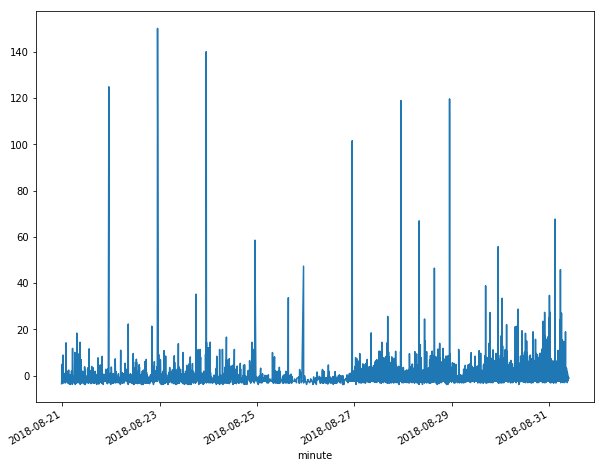

In [595]:
 df_norm.score.plot(figsize=(10,8))

# Getting price data AAPL

In [596]:
price_path = 'C:/Users/rzouga/Desktop/Stage-vermeg/Sentiment analysis through mediaToolkit/Final report (24-30)/price data/AAPL(24-30).csv'

In [597]:
df_price = pd.read_csv(price_path)

In [598]:
df_price[["Name"]] = df_price[["Name"]].apply(pd.to_datetime)
df_price.set_index('Name',inplace=True)

In [599]:
df_price=df_price.rename(columns={
    'Value.1. open':'open', 'Value.2. high':'high', 'Value.3. low':'low', 'Value.4. close':'close',
       'Value.5. volume':'volume'
})

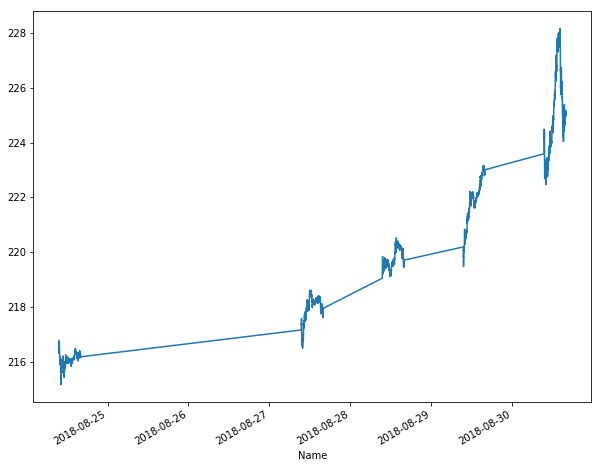

In [600]:
df_price.close.plot(figsize=(10,8))

# Getting price data APC.F

In [601]:
price_path2 = 'C:/Users/rzouga/Desktop/Stage-vermeg/Sentiment analysis through mediaToolkit/Final report (24-30)/price data/APC.F 15 (23-31).csv'

In [602]:
df_price2 = pd.read_csv(price_path2)

In [603]:
df_price2[["Name"]] = df_price2[["Name"]].apply(pd.to_datetime)
df_price2.set_index('Name',inplace=True)

In [604]:
df_price2=df_price2.rename(columns={
    'Value.1. open':'open', 'Value.2. high':'high', 'Value.3. low':'low', 'Value.4. close':'close',
       'Value.5. volume':'volume'
})

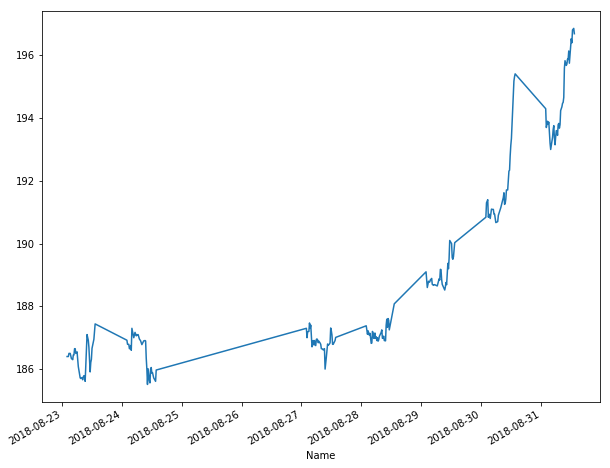

In [605]:
df_price2.close.plot(figsize=(10,8))

# TIME SERIES ANALYSIS

AAPL price

In [606]:
timeseries = df_price['close']

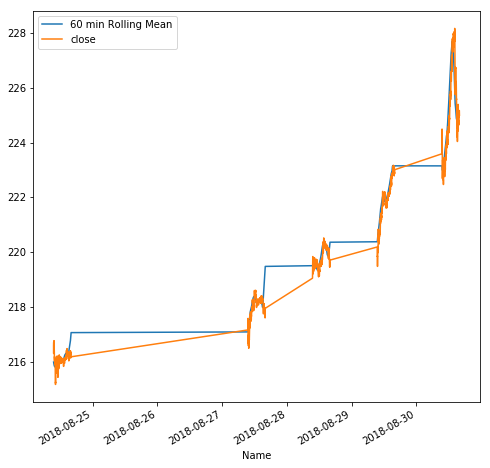

In [607]:
timeseries.rolling(60).mean().plot(label='60 min Rolling Mean')
timeseries.plot(figsize=(8,8))
plt.legend()

APC.F price

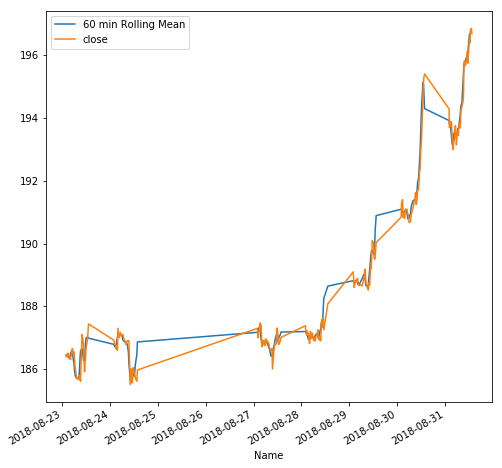

In [608]:
timeseries2 = df_price2['close']
timeseries2.rolling(4).mean().plot(label='60 min Rolling Mean')
timeseries2.plot(figsize=(8,8))
plt.legend()

# Decomposition

<Figure size 432x288 with 0 Axes>

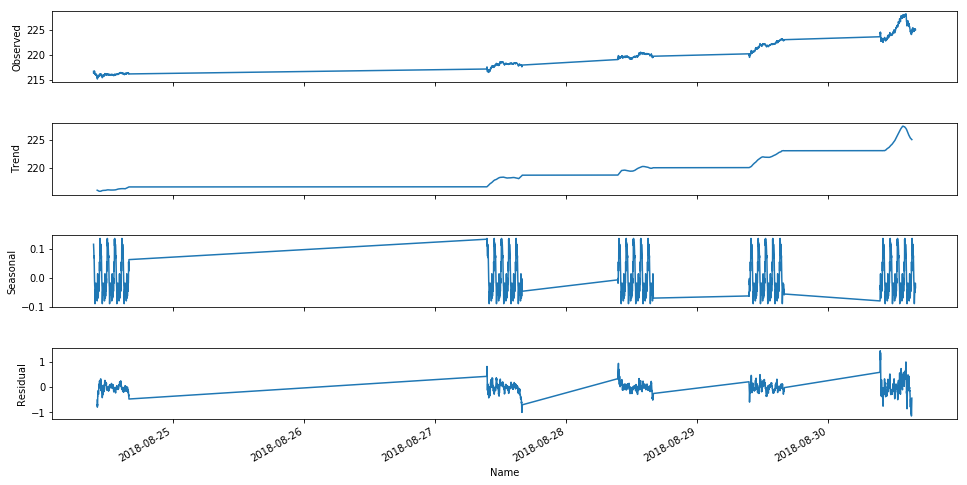

In [609]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_price['close'], freq=80,model='additive')  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

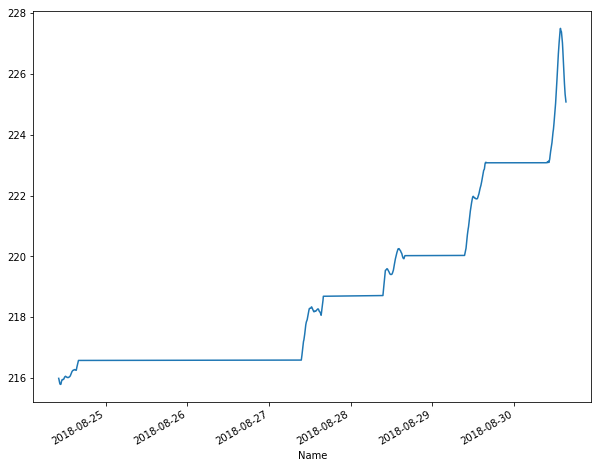

In [610]:
decomposition.trend.plot(figsize=(10,8))

Normalizing df_price to df_price_norm

In [611]:
df_price_norm=pd.DataFrame(df_price.index)
df_price_norm.set_index("Name", inplace=True)

In [612]:
df_price_norm['open-aapl']=(df_price[['open']]-df_price[['open']].mean())/df_price[['open']].std()
df_price_norm['high-aapl']=(df_price[['high']]-df_price[['high']].mean())/df_price[['high']].std()
df_price_norm['low-aapl']=(df_price[['low']]-df_price[['low']].mean())/df_price[['low']].std()
df_price_norm['close-aapl']=(df_price[['close']]-df_price[['close']].mean())/df_price[['close']].std()
df_price_norm['volume-aapl']=(df_price[['volume']]-df_price[['volume']].mean())/df_price[['volume']].std()

In [613]:
df_price_norm.head()

,open-aapl,high-aapl,low-aapl,close-aapl,volume-aapl
Name,,,,,
2018-08-30 15:59:00,1.524621,1.538074,1.521751,1.498456,5.900516
2018-08-30 15:58:00,1.546276,1.531918,1.527964,1.520101,2.331873
2018-08-30 15:57:00,1.549370,1.528839,1.549711,1.541746,1.412801
2018-08-30 15:56:00,1.536995,1.530748,1.552817,1.551764,1.045686
2018-08-30 15:55:00,1.527714,1.538074,1.546946,1.538654,1.412469


Normalizing df_price2 to df_price_norm2

In [614]:
df_price_norm2=pd.DataFrame(df_price2.index)
df_price_norm2.set_index("Name", inplace=True)

In [615]:
df_price_norm2['open-apc']=(df_price2[['open']]-df_price2[['open']].mean())/df_price2[['open']].std()
df_price_norm2['high-apc']=(df_price2[['high']]-df_price2[['high']].mean())/df_price2[['high']].std()
df_price_norm2['low-apc']=(df_price2[['low']]-df_price2[['low']].mean())/df_price2[['low']].std()
df_price_norm2['close-apc']=(df_price2[['close']]-df_price2[['close']].mean())/df_price2[['close']].std()
df_price_norm2['volume-apc']=(df_price2[['volume']]-df_price2[['volume']].mean())/df_price2[['volume']].std()

In [616]:
df_price_norm2.head()

,open-apc,high-apc,low-apc,close-apc,volume-apc
Name,,,,,
2018-08-31 13:30:00,2.266922,2.317784,2.306812,2.359647,-0.205318
2018-08-31 13:15:00,2.417634,2.373500,2.458985,2.412831,-0.110568
2018-08-31 12:45:00,2.499269,2.444693,2.449474,2.397189,-0.401136
2018-08-31 12:30:00,2.317159,2.265163,2.319493,2.268920,-0.445353
2018-08-31 12:15:00,2.320299,2.268258,2.360707,2.309591,-0.470620


# Creating new dataframe for join

In [617]:
rng = pd.date_range(start='2018-08-20',end='2018-08-31', freq='1min')

In [618]:
df_merge=pd.DataFrame(rng)
df_merge.set_index(0, inplace=True)

In [619]:
df_merge.index.name="minute"

In [620]:
df_merge=df_merge.join(df_price_norm).join(df_norm).join(df_price_norm2)

In [621]:
df_merge['open-apc']=df_merge['open-apc'].interpolate(method='linear', axis=0).ffill().bfill()
df_merge['close-apc']=df_merge['close-apc'].interpolate(method='linear', axis=0).ffill().bfill()
df_merge['volume-apc']=df_merge['volume-apc'].interpolate(method='linear', axis=0).ffill().bfill()
df_merge['low-apc']=df_merge['low-apc'].interpolate(method='linear', axis=0).ffill().bfill()
df_merge['high-apc']=df_merge['high-apc'].interpolate(method='linear', axis=0).ffill().bfill()

In [622]:
df_merge['open-aapl']=df_merge['open-aapl'].interpolate(method='linear', axis=0).ffill().bfill()
df_merge['close-aapl']=df_merge['close-aapl'].interpolate(method='linear', axis=0).ffill().bfill()
df_merge['volume-aapl']=df_merge['volume-aapl'].interpolate(method='linear', axis=0).ffill().bfill()
df_merge['low-aapl']=df_merge['low-aapl'].interpolate(method='linear', axis=0).ffill().bfill()
df_merge['high-aapl']=df_merge['high-aapl'].interpolate(method='linear', axis=0).ffill().bfill()

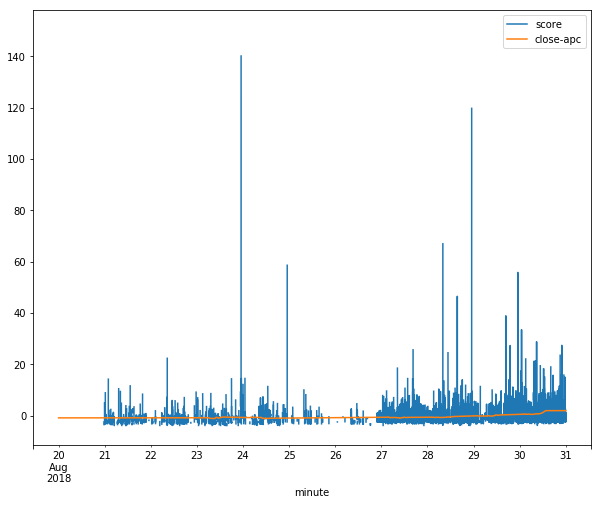

In [623]:
df_merge[["score","close-apc"]].plot(figsize=(10,8))

In [624]:
df_merge.to_csv("data-file.csv")

normalizing score

In [625]:
df_merge['score']=(df_merge[['score']]-df_merge[['score']].mean())/df_merge[['score']].std()

In [626]:
df_merge.corr(method='pearson', min_periods=2)

,open-aapl,high-aapl,low-aapl,close-aapl,volume-aapl,reach_sum,virality_mean,influence_score_sum,followers_mean,like_count,...,love_count,retweet_count,positive_sentiment,negative_sentiment,score,open-apc,high-apc,low-apc,close-apc,volume-apc
open-aapl,1.000000,0.999200,0.999317,0.999342,0.091684,0.125868,-0.015435,-0.011106,-0.036586,-0.004621,...,-0.024865,0.440490,0.067924,0.149918,0.106130,0.948410,0.950923,0.948794,0.950878,0.271148
high-aapl,0.999200,1.000000,0.998866,0.999589,0.099070,0.126559,-0.015072,-0.010701,-0.035366,-0.004140,...,-0.024601,0.439017,0.068019,0.147629,0.106056,0.944416,0.947454,0.945029,0.947647,0.271075
low-aapl,0.999317,0.998866,1.000000,0.999404,0.085270,0.125924,-0.015269,-0.009935,-0.036106,-0.004991,...,-0.024110,0.440419,0.068537,0.149662,0.106560,0.942462,0.946187,0.943231,0.946547,0.273705
close-aapl,0.999342,0.999589,0.999404,1.000000,0.090666,0.125287,-0.015110,-0.009515,-0.035697,-0.003184,...,-0.024454,0.436704,0.068307,0.147186,0.106355,0.945657,0.949682,0.946381,0.949985,0.272570
volume-aapl,0.091684,0.099070,0.085270,0.090666,1.000000,0.037810,-0.003281,-0.017585,-0.014181,-0.038532,...,-0.010946,0.131199,0.002099,0.052119,0.003363,0.099475,0.093711,0.088371,0.082164,0.098459
reach_sum,0.125868,0.126559,0.125924,0.125287,0.037810,1.000000,0.012305,0.124617,0.694855,0.036489,...,0.312445,0.262622,0.095667,0.170933,0.338948,0.102152,0.101492,0.101329,0.100740,0.030847
virality_mean,-0.015435,-0.015072,-0.015269,-0.015110,-0.003281,0.012305,1.000000,0.044446,0.000796,-0.009192,...,-0.002724,-0.009968,-0.025570,-0.000266,0.103187,-0.020126,-0.020218,-0.019582,-0.019683,-0.001765
influence_score_sum,-0.011106,-0.010701,-0.009935,-0.009515,-0.017585,0.124617,0.044446,1.000000,0.080359,0.802564,...,0.106668,-0.028097,0.767618,0.190255,0.846927,0.003571,0.007402,0.004820,0.008661,-0.014388
followers_mean,-0.036586,-0.035366,-0.036106,-0.035697,-0.014181,0.694855,0.000796,0.080359,1.000000,0.035604,...,0.492730,-0.059584,0.009007,-0.016065,0.310297,-0.035237,-0.034040,-0.034514,-0.033364,-0.019221
like_count,-0.004621,-0.004140,-0.004991,-0.003184,-0.038532,0.036489,-0.009192,0.802564,0.035604,1.000000,...,0.058060,-0.153398,0.783046,0.088016,0.844054,0.024482,0.026650,0.025746,0.027901,-0.028091


In [662]:
df_merge.corrwith(df_merge.score.shift(1))

open-aapl              0.106163
high-aapl              0.106163
low-aapl               0.106776
close-aapl             0.106528
volume-aapl            0.002565
reach_sum              0.031968
virality_mean          0.030877
influence_score_sum    0.002618
followers_mean         0.008211
like_count             0.011982
comment_count          0.009568
share_count            0.009142
tweet_count                 NaN
love_count             0.005424
retweet_count          0.064842
positive_sentiment    -0.003513
negative_sentiment     0.014034
score                  0.026295
open-apc               0.107105
high-apc               0.107686
low-apc                0.107341
close-apc              0.107936
volume-apc             0.018496
shifted_close          0.004581
shifted_volume        -0.082443
dtype: float64

In [628]:
corre=pd.DataFrame()

In [629]:
arrr=[]
for i in range(5000):
    arrr.append(i)


In [630]:
corre["num"]=arrr

In [631]:
%time
arrr1=[]
arrr2=[]
for index,item in corre.iterrows():
    df_merge["shifted_close"]=df_merge["close-aapl"].shift(-index).fillna(0)
    df_merge["shifted_volume"]=df_merge["volume-aapl"].shift(-index).fillna(0)
    arrr1.append(df_merge.corrwith(df_merge["score"].shift(index))["shifted_close"])
    arrr2.append(df_merge.corrwith(df_merge["score"].shift(index))["shifted_volume"])
corre["result_close"]=arrr1
corre["result_volume"]=arrr2

Wall time: 0 ns


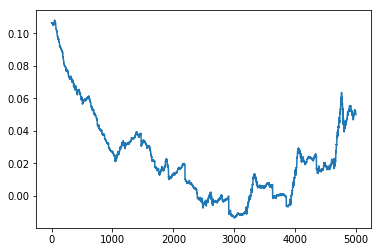

In [646]:
corre["result_close"].plot()

In [633]:
corre["result_volume"].idxmax()

4593

# Machine learning part

Linear Regression model

In [634]:
from sklearn import linear_model
import statsmodels.api as sm

In [635]:
MLdf = df_merge.fillna(0)

Input Values

In [636]:
MLDF_train = MLdf[:10000][[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc','close-aapl']]

In [637]:
MLDF_test = MLdf[10001:][[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc','close-aapl']]

In [638]:
X = MLDF_train[[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc']]

In [639]:
Y = MLDF_train[['close-aapl']]

In [640]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [641]:
res1 = regr.predict(MLDF_test[[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc']])

In [642]:
MLDF_test[['close-aapl']].head()

,close-aapl
minute,
2018-08-26 22:41:00,-0.975764
2018-08-26 22:42:00,-0.975687
2018-08-26 22:43:00,-0.975610
2018-08-26 22:44:00,-0.975533
2018-08-26 22:45:00,-0.975456


In [643]:
MLDF_test['res'] = res1

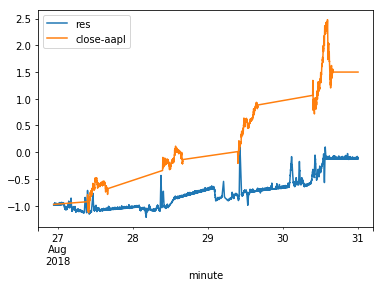

In [644]:
MLDF_test[['res','close-aapl']].plot()

# Other machine learning algorithms in ML folder